In [ ]:
import pandas as pd
import math
import numpy
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [ ]:
house_data=pd.read_csv('/content/kc_house_data.csv')
test_data=pd.read_csv('/content/kc_house_test_data.csv')
train_data=pd.read_csv('/content/kc_house_train_data.csv')
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [ ]:
test_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
1,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2,1202000200,20141103T000000,233000.0,3,2.00,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
3,8562750320,20141110T000000,580500.0,3,2.50,2320,3980,2.0,0,0,3,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
4,7589200193,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,0,4,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,8672200110,20150317T000000,1088000.0,5,3.75,4170,8142,2.0,0,2,3,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980
4225,5087900040,20141017T000000,350000.0,4,2.75,2500,5995,2.0,0,0,3,8,2500,0,2008,0,98042,47.3749,-122.107,2530,5988
4226,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
4227,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [ ]:
def bedrooms_squared(x):
  bedrooms_squared=(x.bedrooms)**2
  return (bedrooms_squared)

In [ ]:
bedrooms_squared(test_data).mean()

12.4466777015843

In [ ]:
def bed_bath_room(y):
  bed_bath_room=y.bedrooms*y.bathrooms
  return (bed_bath_room)

In [ ]:
bed_bath_room(test_data).mean()

7.5039016315913925

In [ ]:
def log_sqft_living(z):
  log_sqft_living=numpy.log(z.sqft_living)
  return (log_sqft_living)

In [ ]:
log_sqft_living(test_data).mean()

7.550274679645921

In [ ]:
def lat_plus_long(y):
  lat_plus_long=y.lat+y.long
  return (lat_plus_long)

In [ ]:
lat_plus_long(test_data).mean()

-74.65333355403185

In [ ]:
test_data['bedrooms_squared']=bedrooms_squared(test_data)
test_data['bed_bath_rooms']=bed_bath_room(test_data)
test_data['log_sqft_living']=log_sqft_living(test_data)
test_data['lat_plus_long']=lat_plus_long(test_data)

In [ ]:
test_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,9,3.00,7.265430,-74.4732
1,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000,16,12.00,7.989560,-74.8036
2,1202000200,20141103T000000,233000.0,3,2.00,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705,9,6.00,7.444249,-74.9132
3,8562750320,20141110T000000,580500.0,3,2.50,2320,3980,2.0,0,0,3,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980,9,7.50,7.749322,-74.5309
4,7589200193,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,0,4,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080,9,3.00,6.993933,-74.6861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,8672200110,20150317T000000,1088000.0,5,3.75,4170,8142,2.0,0,2,3,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980,25,18.75,8.335671,-74.6456
4225,5087900040,20141017T000000,350000.0,4,2.75,2500,5995,2.0,0,0,3,8,2500,0,2008,0,98042,47.3749,-122.107,2530,5988,16,11.00,7.824046,-74.7321
4226,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,16,10.00,7.832014,-74.6533
4227,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,16,10.00,7.745003,-74.8513


In [ ]:
x=test_data[[ 'sqft_living', 'bedrooms', 'bathrooms', 'lat','long']]
y=test_data[['sqft_living','bedrooms', 'bathrooms', 'lat','long','bed_bath_rooms']]
z=test_data[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']]
t=test_data[['price']]

In [ ]:
model=LinearRegression()
model.fit(x,t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([[ 2.91523046e+02, -3.63442805e+04,  2.24784634e+04,
         6.49781148e+05, -3.22967664e+05]])

In [ ]:
train_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
17380,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
17381,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
17382,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
train_data['bedrooms_squared']=bedrooms_squared(train_data)
train_data['bed_bath_rooms']=bed_bath_room(train_data)
train_data['log_sqft_living']=log_sqft_living(train_data)
train_data['lat_plus_long']=lat_plus_long(train_data)

In [ ]:
train_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_squared,bed_bath_rooms,log_sqft_living,lat_plus_long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,9,3.00,7.073270,-74.7458
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,6.75,7.851661,-74.5980
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4,2.00,6.646391,-74.4951
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,16,12.00,7.580700,-74.8722
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,9,6.00,7.426549,-74.4282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,16,14.00,8.163371,-74.8443
17380,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,9,7.50,7.177782,-74.8317
17381,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,9,7.50,7.333023,-74.6467
17382,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,9,7.50,7.377759,-74.5345


In [ ]:
p=train_data[[ 'sqft_living', 'bedrooms', 'bathrooms', 'lat','long']]
q=train_data[['sqft_living','bedrooms', 'bathrooms', 'lat','long','bed_bath_rooms']]
r=train_data[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']]
s=train_data[['price']]

In [ ]:
model1=LinearRegression()
model1.fit(p,s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model1.coef_

array([[ 3.12258646e+02, -5.95865332e+04,  1.57067421e+04,
         6.58619264e+05, -3.09374351e+05]])

In [ ]:
model2=LinearRegression()
model2.fit(q,s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model2.coef_

array([[ 3.06610053e+02, -1.13446368e+05, -7.14613083e+04,
         6.54844630e+05, -2.94298969e+05,  2.55796520e+04]])

In [ ]:
model3=LinearRegression()
model3.fit(r,s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model3.coef_

array([[ 5.29422820e+02,  3.45142296e+04,  6.70607813e+04,
         5.34085611e+05, -4.06750711e+05, -8.57050439e+03,
        -6.78858667e+03, -5.61831484e+05,  1.27334900e+05]])

In [ ]:
def rss(b,c):
  rss=(s-b.predict(c))**2
  rss=rss.sum()
  return (rss)

In [ ]:
rss(model1,p)

price    9.678800e+14
dtype: float64

In [ ]:
rss(model2,q)

price    9.584196e+14
dtype: float64

In [ ]:
rss(model3,r)

price    9.034365e+14
dtype: float64

## GRADIENT decent for single variable

In [ ]:
import numpy as np

In [ ]:
#x=np.array(test_data['sqft_lot'])
#y=np.array(test_data['price'])
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

In [ ]:
test_data['sqft_lot']

0       19901
1        5000
2        4697
3        3980
4        3000
        ...  
4224     8142
4225     5995
4226     6023
4227     5813
4228     1350
Name: sqft_lot, Length: 4229, dtype: int64

In [ ]:
x

array([1, 2, 3, 4, 5])

In [ ]:
y

array([ 5,  7,  9, 11, 13])

In [ ]:
t=np.array([1,2,3])
t

array([1, 2, 3])

In [ ]:
def gradient_decent(x,y):
  m_curr=b_curr=0
  itterations=50
  n=len(x)
  learning_rate=0.0001

  for i in range(itterations):
     y_pre=m_curr*x+b_curr
     cost=(1/n)*sum([a**2 for a in (y-y_pre)])
     md = -(2/n)*sum(x*(y-y_pre))
     bd = -(2/n)*sum(y-y_pre)
     m_curr = m_curr - learning_rate * md
     b_curr = b_curr - learning_rate * bd
     print ("m {}, b {},cost{} ,itterations {}".format(m_curr,b_curr,cost, i))


In [ ]:
gradient_decent(x,y)

m 0.006200000000000001, b 0.0018000000000000002,cost89.0 ,itterations 0
m 0.012385280000000002, b 0.00359592,cost88.58369304 ,itterations 1
m 0.018555874832000004, b 0.005387769648,cost88.16935357626447 ,itterations 2
m 0.024711819245580805, b 0.0071755585691712,cost87.75697230888764 ,itterations 3
m 0.030853147908099024, b 0.008959296365910018,cost87.34653998192246 ,itterations 4
m 0.03697989540488166, b 0.010738992617891976,cost86.93804738317266 ,itterations 5
m 0.04309209623942019, b 0.012514656882125469,cost86.53148534398603 ,itterations 6
m 0.04918978483356419, b 0.014286298693005392,cost86.12684473904856 ,itterations 7
m 0.055272995527714544, b 0.016053927562366652,cost85.72411648617962 ,itterations 8
m 0.06134176258101615, b 0.01781755297953755,cost85.32329154612809 ,itterations 9
m 0.0673961201715502, b 0.01957718441139303,cost84.92436092236937 ,itterations 10
m 0.07343610239652595, b 0.021332831302407824,cost84.52731566090353 ,itterations 11
m 0.07946174327247216, b 0.02308450

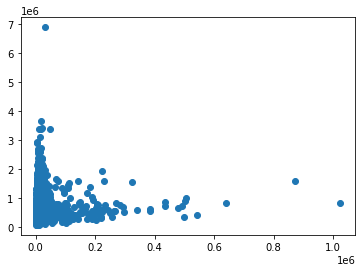

In [ ]:
plt.scatter(x,y)
